In [1]:
import numpy as np
import networkx as nx
import scipy
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
import pprint
import random
from gymnasium import Env
from gymnasium.spaces import Graph,Discrete,Box
import gymnasium as gym


The algorithm consists of converting a Voronoi diagram, 
which is a partitioning of a plane into regions based on the distance 
to points in a specific subset of the plane, into a weighted graph represented
by a networkx object in Python.
The input to the algorithm is a list of points in two dimensions.
The Voronoi diagram is computed using the scipy.spatial library,
which returns a set of vertices and edges representing the diagram.
The algorithm then iterates through the edges of the Voronoi diagram
and checks if each edge connects two points whose coordinates lie 
in the range [0,1]. If so, the edge is added as an edge in the 
networkx graph, with a weight equal to the Euclidean distance between
the two endpoints of the edge.
Finally, the resulting networkx graph is returned as output. 
This graph represents the Voronoi diagram as a weighted graph, where 
the vertices correspond to the points in the input list and the edges 
represent the borders between the Voronoi regions. The weights on the 
edges represent the lengths of these borders.
The algorithm for converting a Voronoi diagram into a weighted networkx 
graph is useful for generating planar graphs in several ways.
Firstly, the Voronoi diagram itself can be thought of as a planar graph, 
where the vertices represent the input points and the edges represent the 
borders between the Voronoi regions. This graph can be used for various 
applications, such as geographic information systems, computer vision, 
and computational geometry.

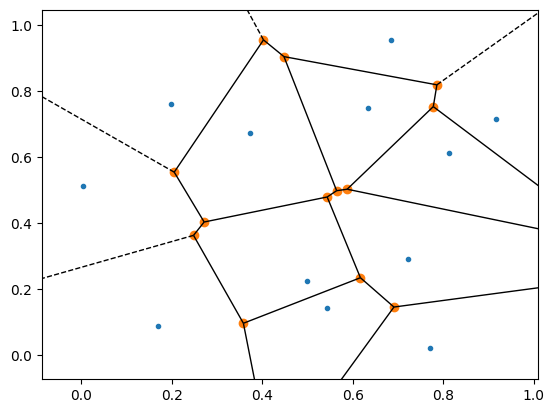

In [2]:
# to not make the plots inline
# %matplotlib
%matplotlib inline

# we create a function to generate a planar graph from a voronoi diagram
def voronoi_to_networkx(points):
    # we get the voronoi diagram
    vor = Voronoi(points)

    G = nx.Graph()

    # Add an edge for each ridge in the Voronoi diagram that connects two points in the range [0,1] 
    for simplex in vor.ridge_vertices:
        if -1 not in simplex:
            i, j = simplex
            p = vor.vertices[i]
            q = vor.vertices[j]
            if 0 <= p[0] <= 1 and 0 <= p[1] <= 1 and 0 <= q[0] <= 1 and 0 <= q[1] <= 1:
                distance = np.linalg.norm(p - q) # Calculate the Euclidean distance between p and q
                G.add_edge(tuple(p), tuple(q),weight=distance)
    return G

#We create 12 points from which the voronoi diagram will be generated
np.random.seed(10)
points=np.random.rand(12,2)

#we plot the diagram
vor=Voronoi(points)
scipy.spatial.voronoi_plot_2d(vor)
plt.show()

going to print pos
{(0.20552139150292098, 0.554666334735012): (0.20552139150292098,
                                            0.554666334735012),
 (0.24818478970668256, 0.3632582302672966): (0.24818478970668256,
                                             0.3632582302672966),
 (0.2716968251825983, 0.4037184254055209): (0.2716968251825983,
                                            0.4037184254055209),
 (0.3584447216903549, 0.09709933172300317): (0.3584447216903549,
                                             0.09709933172300317),
 (0.4028840030738831, 0.9550652406422548): (0.4028840030738831,
                                            0.9550652406422548),
 (0.44811437238452245, 0.9045289990489157): (0.44811437238452245,
                                             0.9045289990489157),
 (0.5436834171910225, 0.4794823724928077): (0.5436834171910225,
                                            0.4794823724928077),
 (0.5645777573174426, 0.4985268421861343): (0.5645777573174426,
     

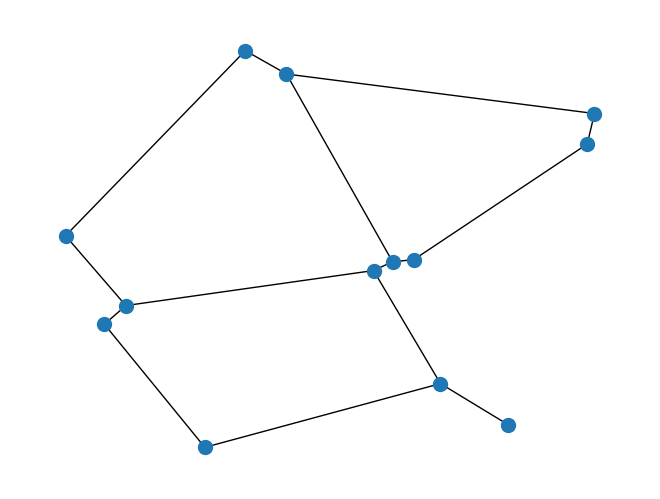

[(0.3584447216903549, 0.09709933172300317),
 (0.6171489120032924, 0.23498045883754137),
 (0.6912996529354414, 0.14621566078753526),
 (0.24818478970668256, 0.3632582302672966),
 (0.2716968251825983, 0.4037184254055209),
 (0.5436834171910225, 0.4794823724928077),
 (0.20552139150292098, 0.554666334735012),
 (0.4028840030738831, 0.9550652406422548),
 (0.5878657769460599, 0.5030173533835035),
 (0.7782905262525464, 0.7531008790263298),
 (0.5645777573174426, 0.4985268421861343),
 (0.44811437238452245, 0.9045289990489157),
 (0.7862371954417654, 0.8190658169987436)]
Graph with 13 nodes and 15 edges


In [3]:
#We convert diagram to networkx graph
graph=voronoi_to_networkx(points)

#We assign each node to its actual position in the plane
pos = dict(zip(graph.nodes(), graph.nodes())) 

print ('going to print pos')
pprint.pprint(pos)
nx.draw(graph, pos,node_size=100)

#We check that the graph is planar.
print(nx.is_planar(graph))
plt.show()

# to print every node edge and weight of the graph
# print('going to print the graph')
# pprint.pprint([(n, nbrdict) for n, nbrdict in graph.adjacency()])

pprint.pprint(list(graph.nodes()))
len(graph.nodes())

# Now we are going to save the graph and later import it

nx.write_graphml(graph,'g1.gml')
print(graph)

In [4]:
def str_to_tuple(string):
    return tuple(float(x) for x in string.strip('()').split(','))

In [5]:
no_nodes = len(graph.nodes())
q_table = np.zeros((no_nodes,3))

In [6]:
# this portion of code is written to certfy the working 
# of the graph after retrieving the saved graph in graphml format

#we retrieve the saved graph
graph1 = nx.read_graphml('g1.gml')

#printing the number of nodes and edges in the retrieved graph
print('going to print the graph')
print(graph1)

going to print the graph
Graph with 13 nodes and 15 edges


In [7]:
# As the nodes are saved in string format, this function changes it 
# to the required tuple of float format. 
# Necessary only if calculations are needed to be done on the nodes
def str_to_tuple(string):
    return tuple(float(x) for x in string.strip('()').split(','))

#saving the nodes of graph in list format
temp = list(graph1.nodes())

# forming a list of tuples from the strings obtained as nodes from the 
# saved files in graphml format
temp = [str_to_tuple(s) for s in temp]

In [8]:
print(temp[6])
print('\n')

pprint.pprint([i for i in graph1.neighbors(str(temp[6]))])

print('\n\n\n')
pprint.pprint([(n, nbrdict) for n, nbrdict in graph1.adjacency()])

(0.20552139150292098, 0.554666334735012)


['(0.2716968251825983, 0.4037184254055209)',
 '(0.4028840030738831, 0.9550652406422548)']




[('(0.3584447216903549, 0.09709933172300317)',
  {'(0.24818478970668256, 0.3632582302672966)': {'weight': 0.2880934082469704},
   '(0.6171489120032924, 0.23498045883754137)': {'weight': 0.29315365135001814}}),
 ('(0.6171489120032924, 0.23498045883754137)',
  {'(0.3584447216903549, 0.09709933172300317)': {'weight': 0.29315365135001814},
   '(0.5436834171910225, 0.4794823724928077)': {'weight': 0.2553005380117695},
   '(0.6912996529354414, 0.14621566078753526)': {'weight': 0.11566123704009502}}),
 ('(0.6912996529354414, 0.14621566078753526)',
  {'(0.6171489120032924, 0.23498045883754137)': {'weight': 0.11566123704009502}}),
 ('(0.24818478970668256, 0.3632582302672966)',
  {'(0.2716968251825983, 0.4037184254055209)': {'weight': 0.04679576052212325},
   '(0.3584447216903549, 0.09709933172300317)': {'weight': 0.2880934082469704}}),
 ('(0.2716968251825983, 